In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
sb.set()

In [2]:
traincsv = pd.read_csv("data/train.csv")
print(traincsv.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [3]:
onlyint = traincsv.select_dtypes("int64")
onlyint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

In [4]:
#Clean the data to have only true int
cleanint = onlyint.drop(['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold'],axis=1)
cleanint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   LotArea        1460 non-null   int64
 2   BsmtFinSF1     1460 non-null   int64
 3   BsmtFinSF2     1460 non-null   int64
 4   BsmtUnfSF      1460 non-null   int64
 5   TotalBsmtSF    1460 non-null   int64
 6   1stFlrSF       1460 non-null   int64
 7   2ndFlrSF       1460 non-null   int64
 8   LowQualFinSF   1460 non-null   int64
 9   GrLivArea      1460 non-null   int64
 10  BsmtFullBath   1460 non-null   int64
 11  BsmtHalfBath   1460 non-null   int64
 12  FullBath       1460 non-null   int64
 13  HalfBath       1460 non-null   int64
 14  BedroomAbvGr   1460 non-null   int64
 15  KitchenAbvGr   1460 non-null   int64
 16  TotRmsAbvGrd   1460 non-null   int64
 17  Fireplaces     1460 non-null   int64
 18  GarageCars     1460 non-null   int64
 19  Garage

In [5]:
#Create new dataframe from sale price
saleprice = pd.DataFrame(cleanint["SalePrice"])
print(type(saleprice))
print(saleprice.size)
saleprice.head()

<class 'pandas.core.frame.DataFrame'>
1460


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [6]:
#find the relavent data points
saleprice.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

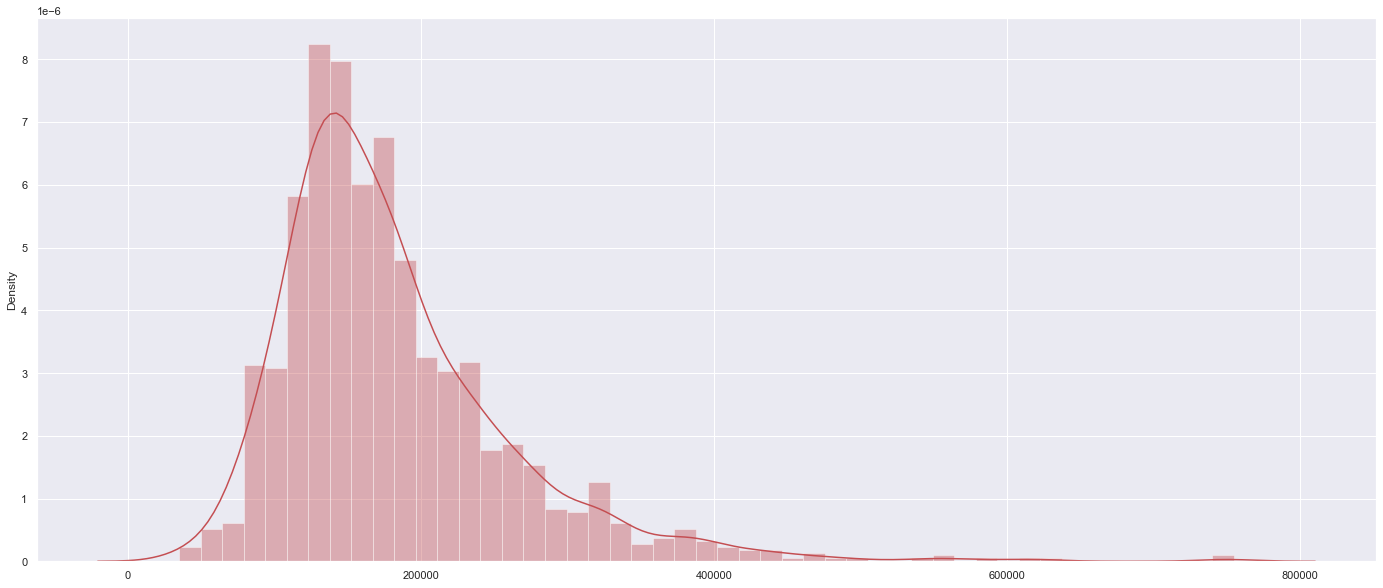

In [7]:
f,axes = plt.subplots(1,1,figsize = (24,10))
sb.distplot(saleprice,color = 'r', ax = axes)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

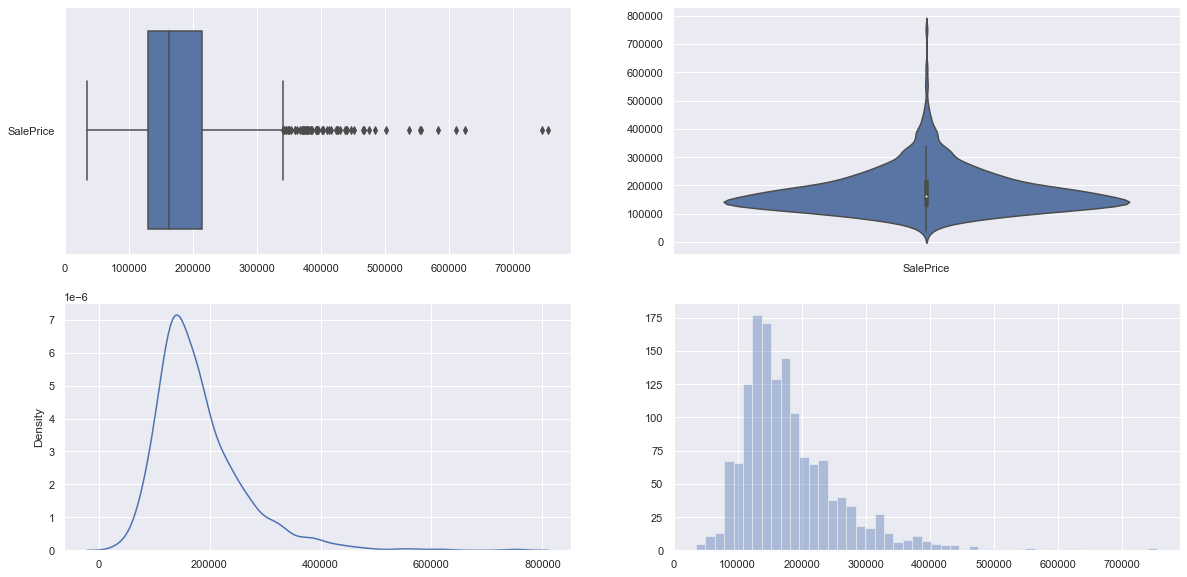

In [8]:
f,axes = plt.subplots(2,2,figsize = (20,10))
sb.boxplot(data = saleprice,orient = "h",ax = axes[0,0])
sb.violinplot(data = saleprice,oreint = 'h',ax = axes[0,1])
sb.distplot(saleprice,hist = False, color = 'b',ax = axes[1,0])
sb.distplot(saleprice,kde = False, color = 'b',ax = axes[1,1])

In [9]:
lotarea = pd.DataFrame(cleanint["LotArea"])
print(type(lotarea))
print(lotarea.size)
lotarea.head()

<class 'pandas.core.frame.DataFrame'>
1460


,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260


In [10]:
lotarea.describe()

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

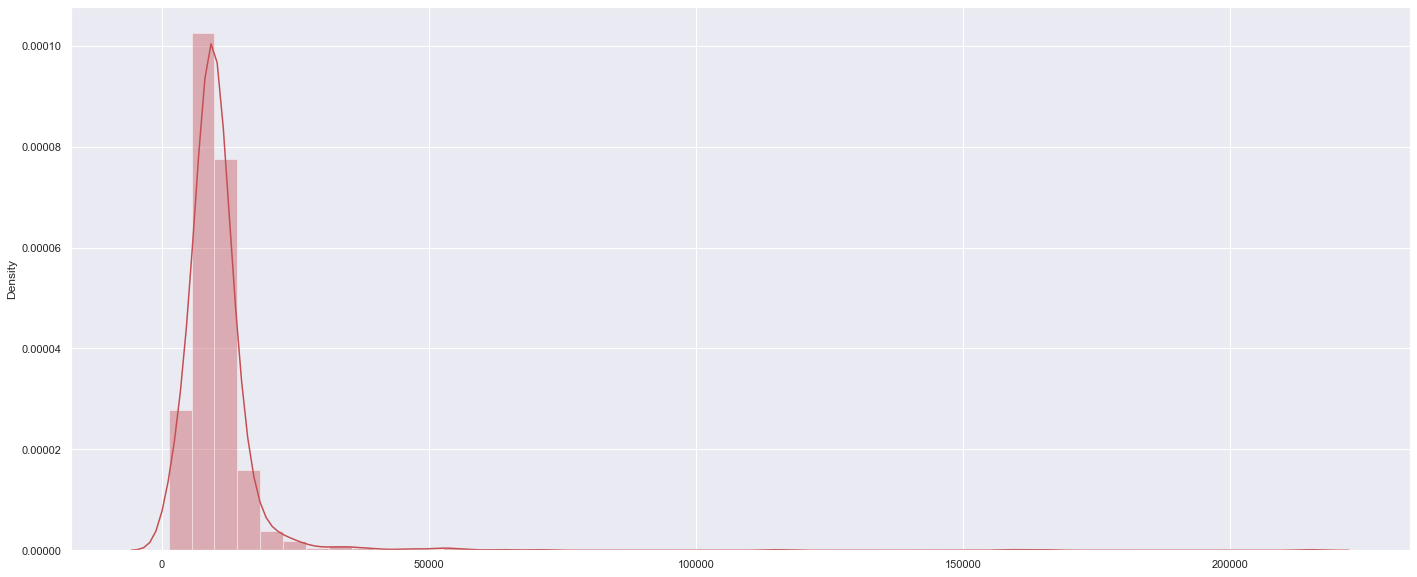

In [11]:
f,axes = plt.subplots(1,1,figsize = (24,10))
sb.distplot(lotarea,color = 'r', ax = axes)

<AxesSubplot:>

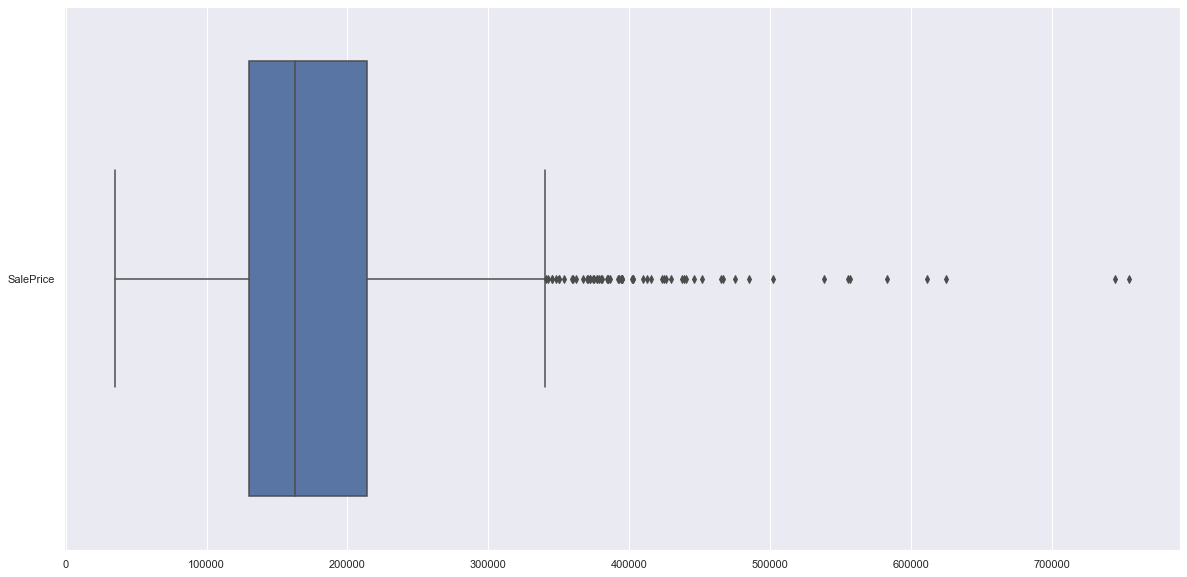

In [12]:
f,axes = plt.subplots(1,figsize = (20,10))
sb.boxplot(data = saleprice,orient = "h",ax = axes)

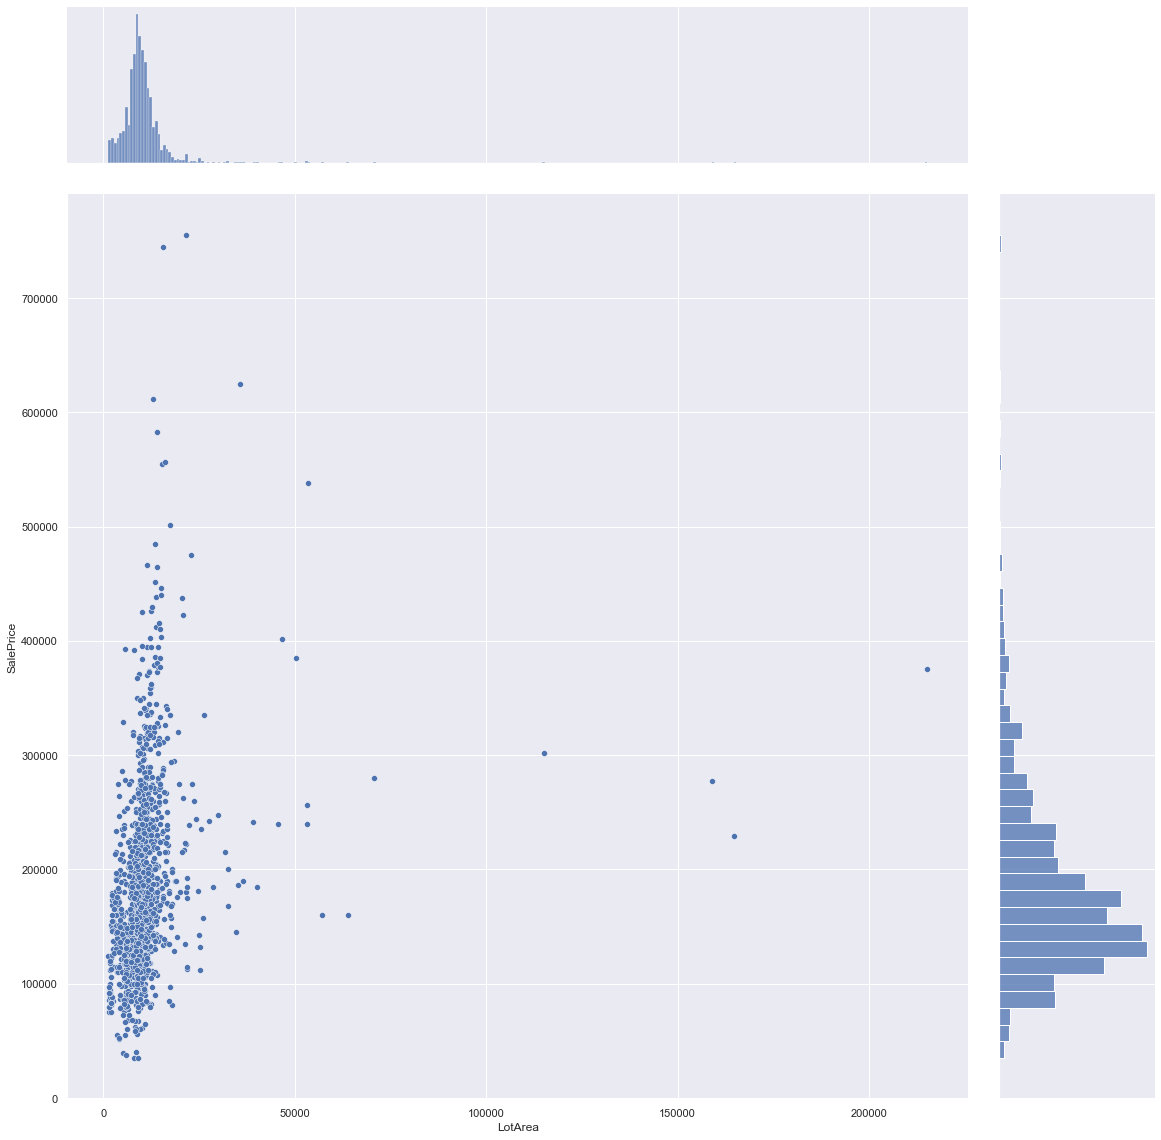

In [13]:
sb.jointplot(x= "LotArea",y = "SalePrice",data = cleanint,height = 16)

In [14]:
jointDF = pd.concat([lotarea, saleprice], axis = 1)
jointDF.corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


<AxesSubplot:>

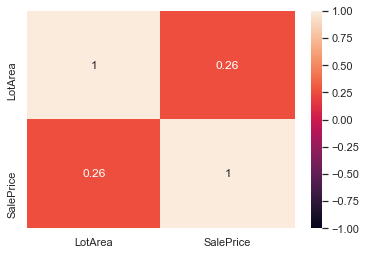

In [15]:
sb.heatmap(jointDF.corr(),vmin = -1,vmax = 1,annot=True)

In [16]:
intorfloat = traincsv.select_dtypes(include = ["int64", "float64"])
intorfloat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [17]:
cleaned = intorfloat.drop(['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold'],axis=1)
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   MasVnrArea     1452 non-null   float64
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinSF2     1460 non-null   int64  
 6   BsmtUnfSF      1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   1stFlrSF       1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  LowQualFinSF   1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  BsmtFullBath   1460 non-null   int64  
 13  BsmtHalfBath   1460 non-null   int64  
 14  FullBath       1460 non-null   int64  
 15  HalfBath       1460 non-null   int64  
 16  BedroomAbvGr   1460 non-null   int64  
 17  KitchenAbvGr   1460 non-null   int64  
 18  TotRmsAb

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


<Figure size 1440x720 with 0 Axes>

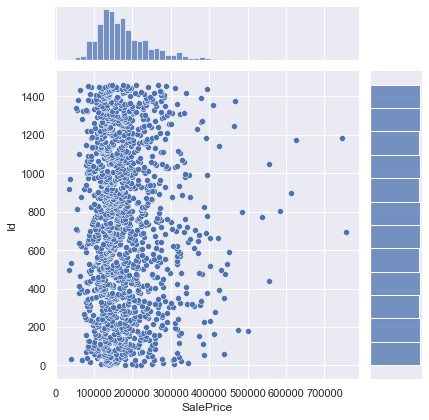

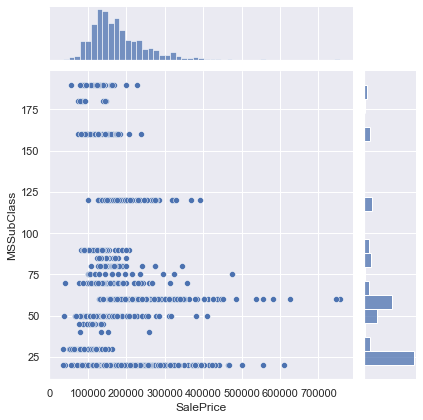

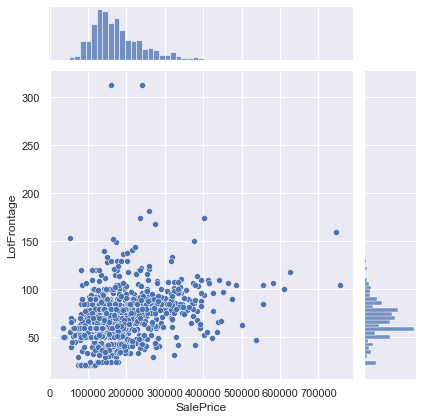

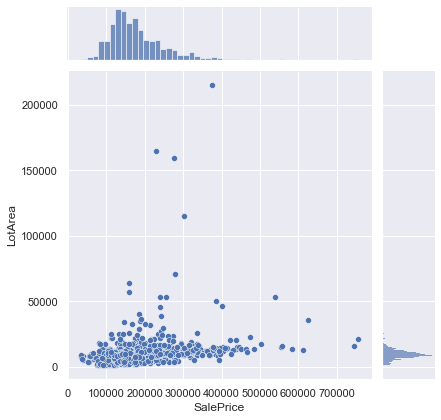

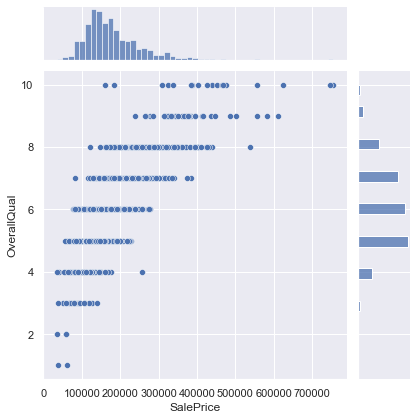

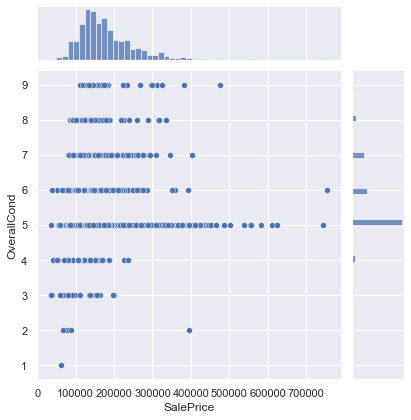

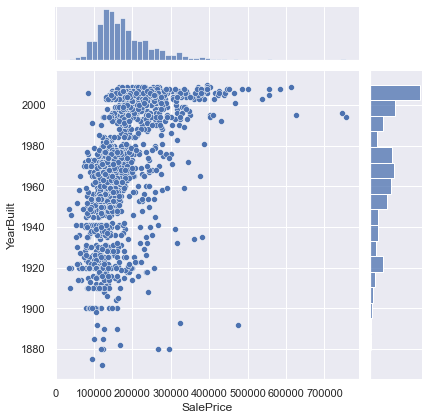

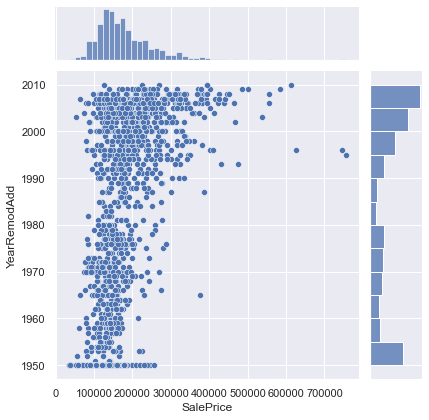

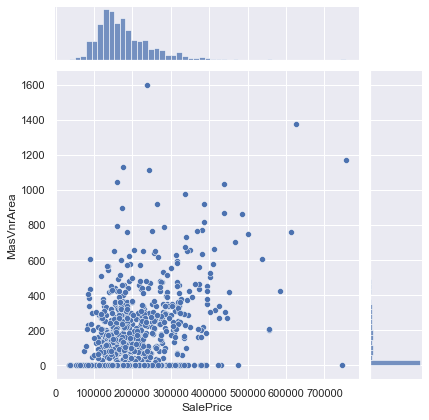

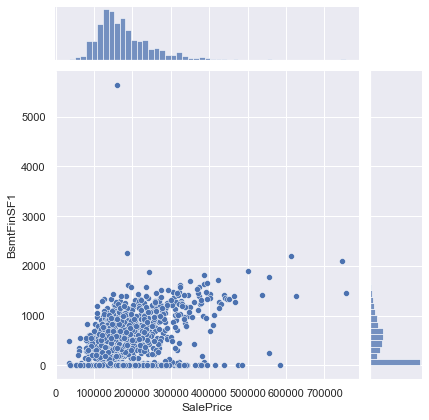

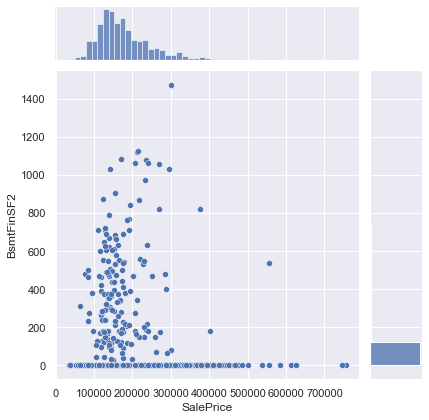

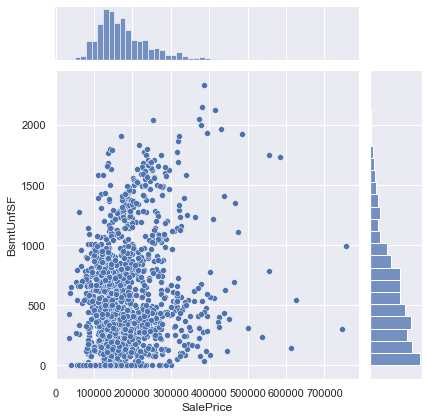

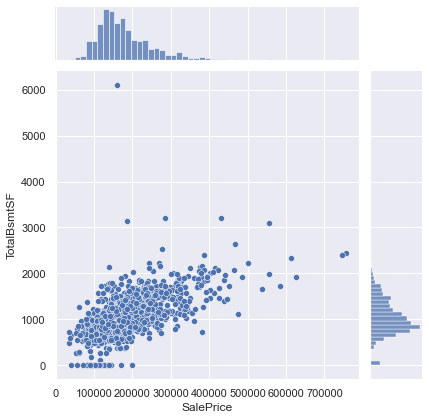

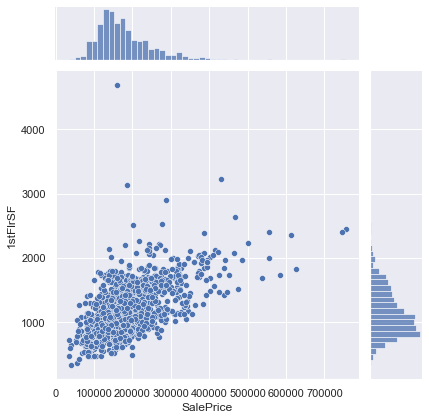

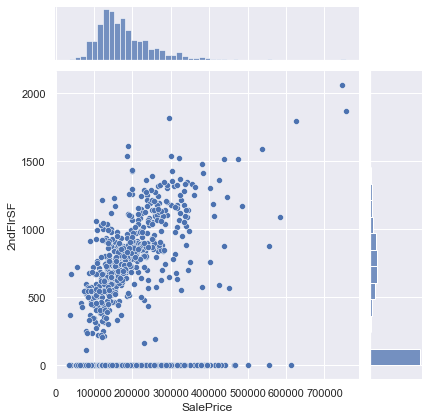

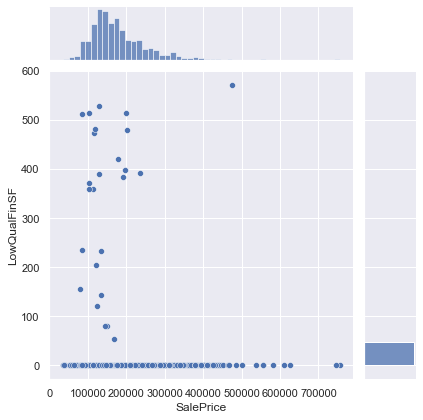

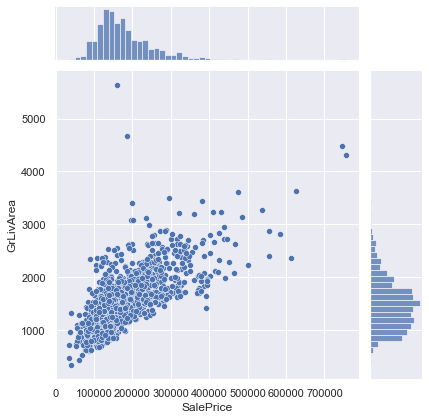

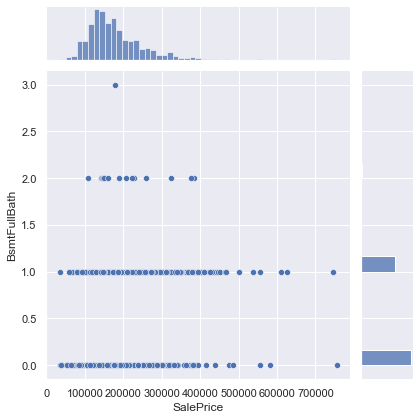

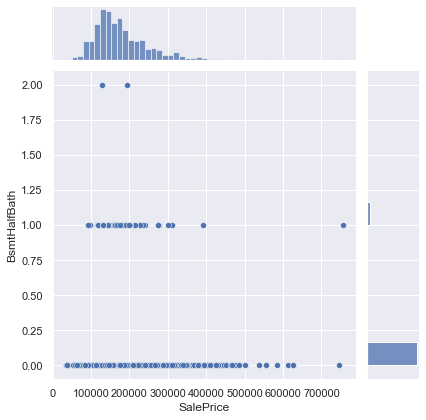

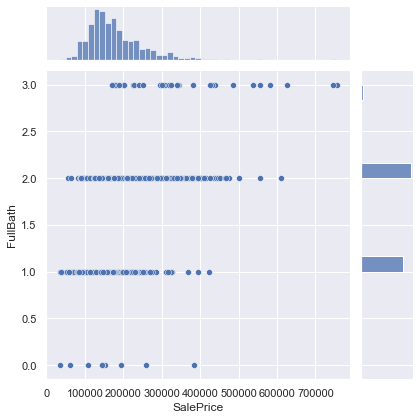

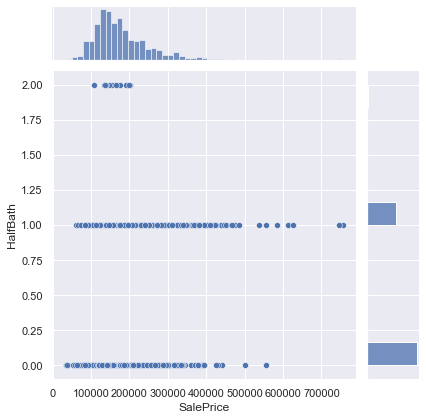

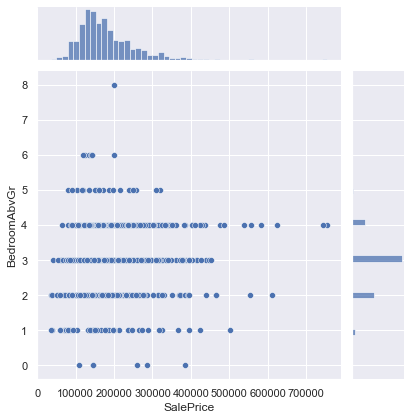

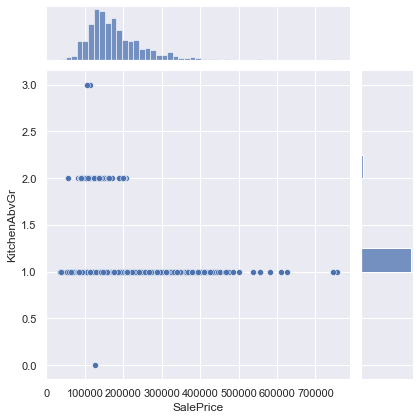

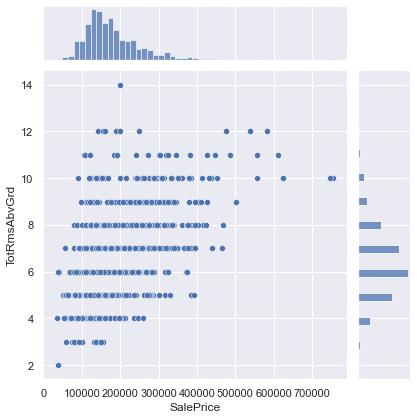

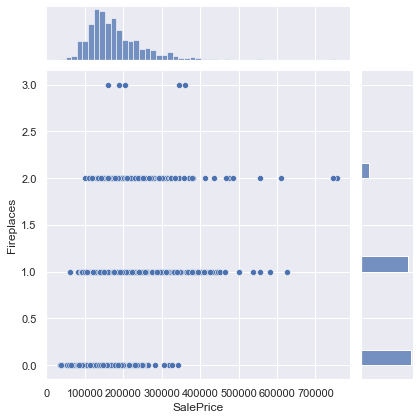

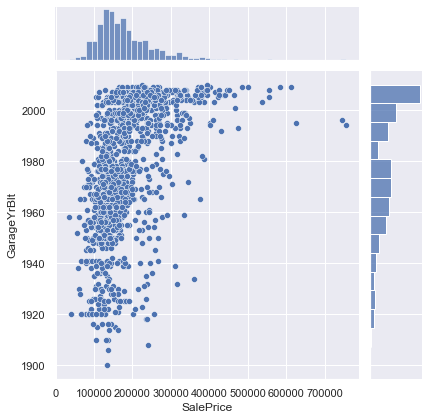

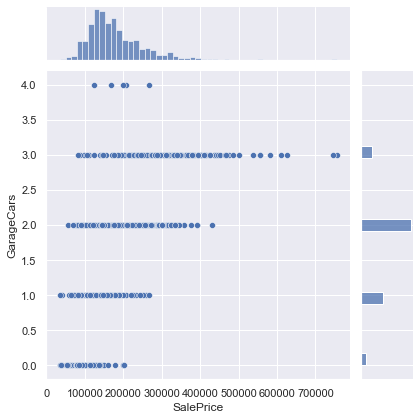

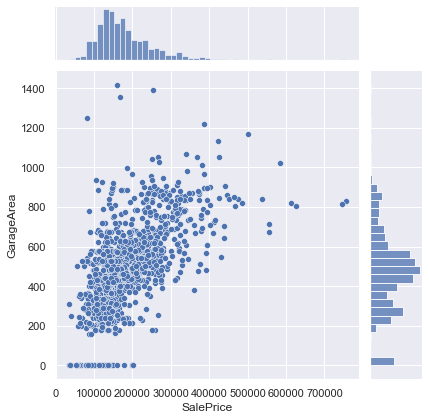

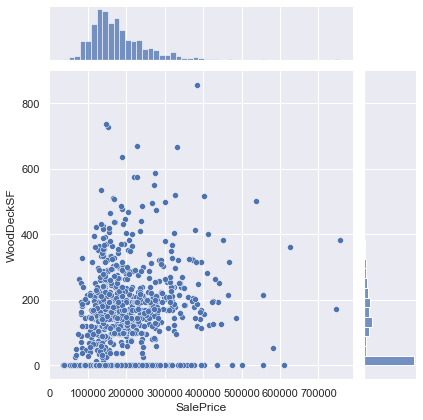

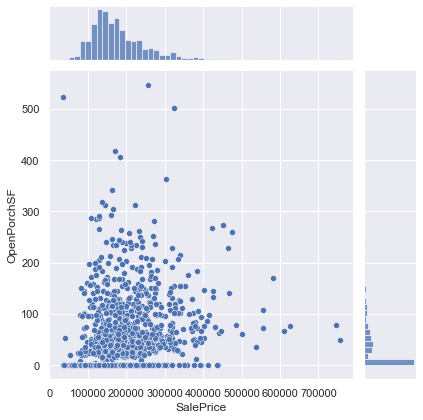

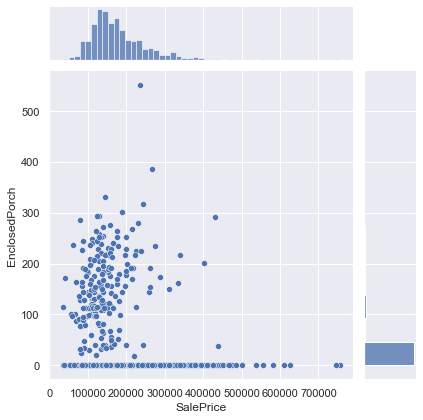

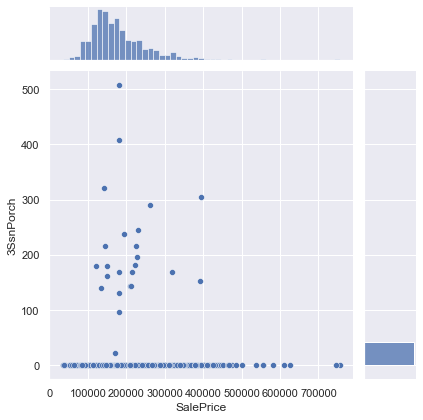

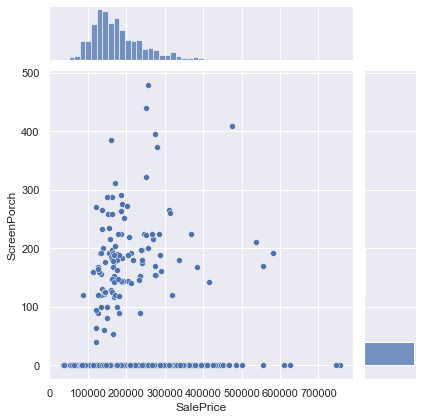

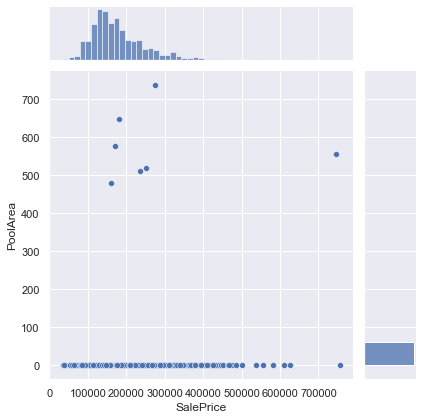

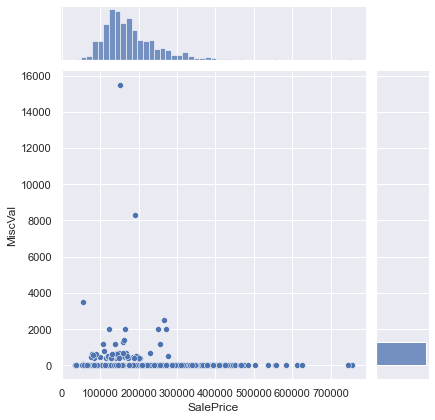

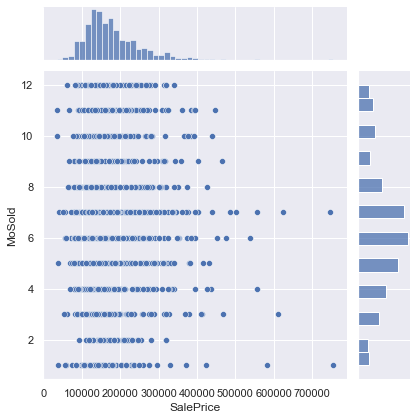

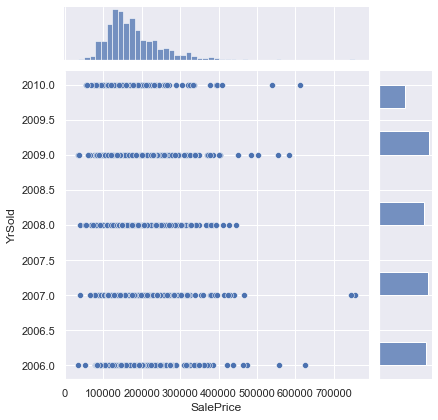

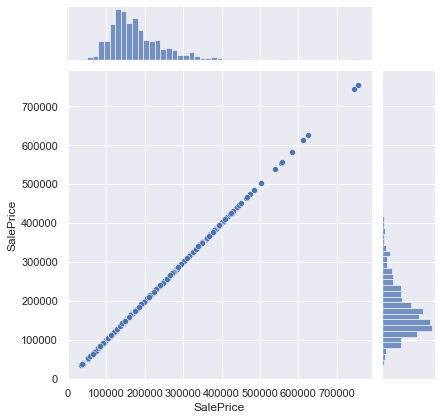

In [40]:
f = plt.figure(figsize=(20, 10))
for i in intorfloat:
    name = str(intorfloat[i].name)
    sb.jointplot(x = "SalePrice", y = name, data = intorfloat)